# So far, we have used the processed IMDB dataset in `keras`. As you have seen, for text to be "usable" in a DNN, we need to transform it into digital form, i.e. integers not strings.

In the basic BoW Dense model, we treat every word as a _feature_

Moreover, for neurons (or ML features in general), we need normalized values [0,1]. Otherwise, words with higher index will be interpretted as higher features importance.

In `keras.datasets.imdb` this digitization was readily made for us. We could see the data represented as numbers:

In [1]:
from pathlib import Path
import os
DATA_PATH=Path('./dat/')
DATA_PATH.mkdir(exist_ok=True)
#if not os.path.exists('./dat/aclImdb_v1.tar.gz'):
if not os.path.exists('./dat/aclImdb'):
    !curl -O http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz 
    !tar -xf aclImdb_v1.tar.gz -C {DATA_PATH}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  16.4M      0  0:00:04  0:00:04 --:--:-- 16.4M


In [2]:
import numpy as np
CLASSES = ['neg', 'pos']#, 'unsup']
PATH=Path('./dat/aclImdb/')

def get_texts(path):
    texts,labels = [],[]
    for idx,label in enumerate(CLASSES):
        for fname in (path/label).glob('*.*'):
            #texts.append(fixup(fname.open('r', encoding='utf-8').read()))
            texts.append(fname.open('r', encoding='utf-8').read())
            labels.append(idx)
    #return np.array(texts),np.array(labels)
    return texts, labels

In [3]:

train_texts,train_labels = get_texts(PATH/'train')
test_texts,test_labels = get_texts(PATH/'test')

In [4]:
for t in train_texts[:10]:
  print(t)
  print('\n')

or: It's a bird ? It's a plane ? No, look... It's a disaster ! or: No need to look up in the sky.<br /><br />or: (... OK, that's enough.) If singer tried to make a romantic titanic like movie to crash the box office record, he failed. The SR structure can't do this, the dark and restricted color scheme (I would call it "wishi-washi"), the boring usual dialogs, the clown with advanced alien technology, the missing fun and magic, etc. makes the movie completely disappointing.<br /><br />It simply doesn't work.<br /><br />The main thing at a character like superman is, that he is a superhero. That's the core, the most important thing.<br /><br />Love trouble and a sadly lost depressive Supersoftie can maximal only be a facet in a 2:40 long Superman movie, not the whole time.<br /><br />Because then it is not a superman or superhero movie anymore. It's like a (and in this case a very bad and boring) social study, where every 30 minutes a person flies around.<br /><br />That's a big differe

# So what it takes to go from the raw form to the prepared form?

__A - Text preprocessing__

1- Data sequencing: each sentence --> sequence (list) of words

2- Data cleaning: This step varies from task to task. For some tasks it's better to remove special characters and punctuations, for other they are critical (emotiocons). Good for perfromance.

3- Text normalization: in general text morphology is a big issue in NLP. Upper and lower cases, stemming and lemmatization, ...etc. Again it's task dependent.

4- Padding (model dependent): Dense and CNN. RNN can skip this step.

__B- Text preparation__

5- Binarization/vectorization/digitization: transform words into numbers according to a vocab index.



## Text preprocessing

In this phase, we apply some operations on the text, to make it in the most usable form for the task at hand. Mainly we clean it up to be more appealing to the problem we try to solve. The input is __text__ and the output is a transformed __text__.

# Splitting text into sequence


## Manual (split on white spaces)

In [5]:
s = train_texts[0]
s.split()

['or:',
 "It's",
 'a',
 'bird',
 '?',
 "It's",
 'a',
 'plane',
 '?',
 'No,',
 'look...',
 "It's",
 'a',
 'disaster',
 '!',
 'or:',
 'No',
 'need',
 'to',
 'look',
 'up',
 'in',
 'the',
 'sky.<br',
 '/><br',
 '/>or:',
 '(...',
 'OK,',
 "that's",
 'enough.)',
 'If',
 'singer',
 'tried',
 'to',
 'make',
 'a',
 'romantic',
 'titanic',
 'like',
 'movie',
 'to',
 'crash',
 'the',
 'box',
 'office',
 'record,',
 'he',
 'failed.',
 'The',
 'SR',
 'structure',
 "can't",
 'do',
 'this,',
 'the',
 'dark',
 'and',
 'restricted',
 'color',
 'scheme',
 '(I',
 'would',
 'call',
 'it',
 '"wishi-washi"),',
 'the',
 'boring',
 'usual',
 'dialogs,',
 'the',
 'clown',
 'with',
 'advanced',
 'alien',
 'technology,',
 'the',
 'missing',
 'fun',
 'and',
 'magic,',
 'etc.',
 'makes',
 'the',
 'movie',
 'completely',
 'disappointing.<br',
 '/><br',
 '/>It',
 'simply',
 "doesn't",
 'work.<br',
 '/><br',
 '/>The',
 'main',
 'thing',
 'at',
 'a',
 'character',
 'like',
 'superman',
 'is,',
 'that',
 'he',
 'is',


## Using regex

We could escape this trap by keeping only the words, using a regex:

In [6]:
import re 
re.split('\W+',s)

['or',
 'It',
 's',
 'a',
 'bird',
 'It',
 's',
 'a',
 'plane',
 'No',
 'look',
 'It',
 's',
 'a',
 'disaster',
 'or',
 'No',
 'need',
 'to',
 'look',
 'up',
 'in',
 'the',
 'sky',
 'br',
 'br',
 'or',
 'OK',
 'that',
 's',
 'enough',
 'If',
 'singer',
 'tried',
 'to',
 'make',
 'a',
 'romantic',
 'titanic',
 'like',
 'movie',
 'to',
 'crash',
 'the',
 'box',
 'office',
 'record',
 'he',
 'failed',
 'The',
 'SR',
 'structure',
 'can',
 't',
 'do',
 'this',
 'the',
 'dark',
 'and',
 'restricted',
 'color',
 'scheme',
 'I',
 'would',
 'call',
 'it',
 'wishi',
 'washi',
 'the',
 'boring',
 'usual',
 'dialogs',
 'the',
 'clown',
 'with',
 'advanced',
 'alien',
 'technology',
 'the',
 'missing',
 'fun',
 'and',
 'magic',
 'etc',
 'makes',
 'the',
 'movie',
 'completely',
 'disappointing',
 'br',
 'br',
 'It',
 'simply',
 'doesn',
 't',
 'work',
 'br',
 'br',
 'The',
 'main',
 'thing',
 'at',
 'a',
 'character',
 'like',
 'superman',
 'is',
 'that',
 'he',
 'is',
 'a',
 'superhero',
 'That',

In [7]:
s ='human-like robots are dump'
re.split(r'\W+',s)

['human', 'like', 'robots', 'are', 'dump']

In [8]:

s = "what's on your mind?"
re.split(r'\W+',s)

['what', 's', 'on', 'your', 'mind', '']

## Split by white spaces and remove punctuations

For the example above, if we want to keep 'What's' but get rid of the punctuations like ? we can use regex to filter punctuations.

We can use:

In [9]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
re_punc = re.compile('[%s]'% re.escape(string.punctuation))
# remove punctuation from each word 
s= "what's on your mind?"
stripped = [re_punc.sub('',w) for w in s.split()]
stripped

['whats', 'on', 'your', 'mind']

In [11]:
s = 'human-like robots are dump'
stripped = [re_punc.sub('',w) for w in s.split()]
stripped

['humanlike', 'robots', 'are', 'dump']

In [12]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
nltk.tokenize.sent_tokenize(train_texts[0])

["or: It's a bird ?",
 "It's a plane ?",
 'No, look...',
 "It's a disaster !",
 "or: No need to look up in the sky.<br /><br />or: (... OK, that's enough.)",
 'If singer tried to make a romantic titanic like movie to crash the box office record, he failed.',
 'The SR structure can\'t do this, the dark and restricted color scheme (I would call it "wishi-washi"), the boring usual dialogs, the clown with advanced alien technology, the missing fun and magic, etc.',
 "makes the movie completely disappointing.<br /><br />It simply doesn't work.<br /><br />The main thing at a character like superman is, that he is a superhero.",
 "That's the core, the most important thing.<br /><br />Love trouble and a sadly lost depressive Supersoftie can maximal only be a facet in a 2:40 long Superman movie, not the whole time.<br /><br />Because then it is not a superman or superhero movie anymore.",
 "It's like a (and in this case a very bad and boring) social study, where every 30 minutes a person flies 

## Words tokenization

Now, let's do as we did with regex: split on white spaces, and take care of punctuations (human-like --> humanlike)

In [14]:
from nltk.tokenize import word_tokenize
word_tokenize('human-like robots are dump, but cute')

['human-like', 'robots', 'are', 'dump', ',', 'but', 'cute']

## Stop words

Not every word contribute to the semantics or meaning. Some words like 'the', 'to', 'on', 'we',...etc are not important for many tasks, specially classification tasks.

Such words are called _stop words_

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Lemmatization

Unlike stemming, lemmatization understand the root of the word in the language:

(am, is, are → be)

So not only the morphology is considered, but also the root. This has more importance in languages like Arabic (requires special lemmatizers and stemmers).


In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [18]:
lemmatizer = WordNetLemmatizer()
s = 'The little girls rided in the cars'
[lemmatizer.lemmatize(word) for word in s.split()]

['The', 'little', 'girl', 'rided', 'in', 'the', 'car']

In [19]:
lemtizer = WordNetLemmatizer()
s = 'He is going on a journey fishing '
[lemmatizer.lemmatize(word) for word in s.split()]

['He', 'is', 'going', 'on', 'a', 'journey', 'fishing']

__But why are verbs not lemmatized?__

> Indented block


is --> be

# PoS tags

https://www.sketchengine.eu/pos-tags/

In NLP, Part-of-Speech refers to the different classes a word can belong to: noun, verb, adjective, ....etc. The different tags/classes are called tagset, and there's no common standard. They usually encode grammar + tense.

The task of PoS tagging resembles the task of semantic segmentation in CV; assign a class for every word.

In [20]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [21]:
s = 'He is going on a journey fishing on ships'
tagged = nltk.pos_tag(s.split())
tagged

[('He', 'PRP'),
 ('is', 'VBZ'),
 ('going', 'VBG'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('journey', 'NN'),
 ('fishing', 'NN'),
 ('on', 'IN'),
 ('ships', 'NNS')]

In [22]:
print([lemmatizer.lemmatize(word, pos='v') for word in s.split() ])

['He', 'be', 'go', 'on', 'a', 'journey', 'fish', 'on', 'ship']


In [23]:
print([lemmatizer.lemmatize(word,pos='n') for word in s.split()])

['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ship']


In [24]:
from nltk.corpus import wordnet 
s = 'He is going on a journey fishing on ships'
print([lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in s.split()])
print([lemmatizer.lemmatize(word, pos=wordnet.NOUN) for word in s.split()])
print([lemmatizer.lemmatize(word, pos=wordnet.ADJ) for word in s.split()])
print([lemmatizer.lemmatize(word, pos=wordnet.ADV) for word in s.split()])


['He', 'be', 'go', 'on', 'a', 'journey', 'fish', 'on', 'ship']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ship']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ships']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ships']


In [25]:
# combine it by for loop 
pos_tag = [wordnet.VERB , wordnet.NOUN , wordnet.ADJ , wordnet.ADV]
s = 'He is going on a journey fishing on ships'
words = s.split()
for pos in pos_tag :
  words = [lemmatizer.lemmatize(word,pos=pos) for word in words]
words

['He', 'be', 'go', 'on', 'a', 'journey', 'fish', 'on', 'ship']

# Putting all the pipeline together:

In [26]:
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')
nltk.download('omw-1.4')
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Keras 

There are many other NLP tools than NLTK. Keras is a DL framework, that also have some NLP tools, specially for tokenization.

In [27]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
# define the document 
text = 'human-like robots are dump, but cute'
#tokenize the document 
result = text_to_word_sequence(text)
print(result)

['human', 'like', 'robots', 'are', 'dump', 'but', 'cute']


# Text preparation

The preparation phase includes transforming __text__ into __binary/integer/digital format__

For that we need a vocabulary vector:

# Vocab and inverse vocab

Vocabulary is a mapping (dict) from words to indices (integers). It represents ALL the words in a language. But it's hard to get ALL words, so we count only what we have in a dataset/corpus. 

Since we don't account for all words, we might encounter Out-Of-Vocab words which we dont know a mapping for. So we usually reserve a special token index for UNKnown words.

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

texts = train_texts + test_texts # This must be list of strings: 
texts[:10]

['or: It\'s a bird ? It\'s a plane ? No, look... It\'s a disaster ! or: No need to look up in the sky.<br /><br />or: (... OK, that\'s enough.) If singer tried to make a romantic titanic like movie to crash the box office record, he failed. The SR structure can\'t do this, the dark and restricted color scheme (I would call it "wishi-washi"), the boring usual dialogs, the clown with advanced alien technology, the missing fun and magic, etc. makes the movie completely disappointing.<br /><br />It simply doesn\'t work.<br /><br />The main thing at a character like superman is, that he is a superhero. That\'s the core, the most important thing.<br /><br />Love trouble and a sadly lost depressive Supersoftie can maximal only be a facet in a 2:40 long Superman movie, not the whole time.<br /><br />Because then it is not a superman or superhero movie anymore. It\'s like a (and in this case a very bad and boring) social study, where every 30 minutes a person flies around.<br /><br />That\'s a 

In [29]:
tok = Tokenizer()
tok.fit_on_texts(texts)

In [30]:
tok.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'one': 27,
 'he': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'so': 34,
 'who': 35,
 'from': 36,
 'like': 37,
 'or': 38,
 'just': 39,
 'her': 40,
 'out': 41,
 'about': 42,
 'if': 43,
 "it's": 44,
 'has': 45,
 'there': 46,
 'some': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'my': 56,
 'even': 57,
 'would': 58,
 'she': 59,
 'which': 60,
 'only': 61,
 'really': 62,
 'see': 63,
 'story': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'me': 68,
 'well': 69,
 'were': 70,
 'than': 71,
 'much': 72,
 'we': 73,
 'bad': 74,
 'been': 75,
 'get': 76,
 'do': 77,
 'great': 78,
 'other': 79,
 'will': 80,
 'also': 81,
 'into': 82,
 'p

# Important notes on Keras Tokenizer:

- As you can see, the UNK token is added with index = 1. Index 0 is never given.

This info is important when dealing later with Embedding layer in Keras, where padding with 0's might cause OOV if not considered, so we init that layer with vocab_size + 1 (to account for the missing 0). That layer also has option to mask_zero if needed for LSTM.

Another solution would be to -1 from all binarized values. But this would make padded words same as UNK.

In other words, it's a choice to have two different values for:

A- UNK-->1
B- PAD-->0

In this case, the vocab_sz should increase by 1 (for pad), in case the model needs padding like LSTM.

Or keep them both as 0. In this case, the vocab_sz remains the same as given from the tokenizer.

- If you fit a tokenizer wil small vocab using num_words, then take care that the word_index will still hold the full vocab.Then if you vectorize the text, either use tokenizer.texts_to_sequences, which will take care of the passed num_words,or if you develop ur own str2idx dict, then take care of the vocab not to use word_index as is, but limit it with the num_words, __keeping in mind that word_index is ordered by freqeuency__. A better approach is to build your own vocab


In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer 
tok = Tokenizer(num_words = 100 , oov_token='UNK')
tok.fit_on_texts(texts)

In [32]:
len(tok.word_index)

124253

In [33]:
# try to toknize this sentences into words and return thier indcies from vocabulary dictionary 
s ='Hello World'
tok.texts_to_sequences(s)
# be carfuel the tok now see this sentences as a list of characters you must give it a list of words not sentences 

[[1], [1], [1], [1], [1], [], [1], [1], [1], [1], [1]]

In [34]:
tok.texts_to_sequences(s.split())

[[1], [1]]

In [35]:
s='cartoon movie'
tok.texts_to_sequences(s.split())
# cartoon must be found in the vocubalry vector but the sequnce must take a list of list 

[[1], [18]]

In [36]:
s='cartoon movie'
tok.texts_to_sequences([s.split()])

[[1, 18]]

In [37]:
from keras.preprocessing.sequence import pad_sequences 
docs = ['cartoon movie show', 'hello world']
docs = [s.split() for s in docs]
l = tok.texts_to_sequences(docs)
maxlen = max([len(t) for t in texts])

l = np.array(pad_sequences(l,maxlen=maxlen,
                           padding='post',
                           truncating='post')) 
l.shape


(2, 13704)

In [38]:
from keras.preprocessing.text import Tokenizer
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(texts)
bow = tok.texts_to_matrix(texts[:10],mode='count')
bow.shape

(10, 124254)

In [39]:
from keras.preprocessing.text import Tokenizer
tok= Tokenizer(num_words =100,oov_token='UNK')
tok.fit_on_texts(texts)
bow = tok.texts_to_matrix(texts[:10],mode ='count')

In [40]:
bow.shape

(10, 100)



# Putting gll together

to make complete model in these data 

In [41]:

trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

In [42]:

normalize_text(trn_texts[0])

'bird plane look disaster need look sky ok thats enough singer try make romantic titanic like movie crash box office record fail sr structure cant dark restrict color scheme would call wishiwashi bore usual dialog clown advance alien technology miss fun magic etc make movie completely disappoint simply doesnt work main thing character like superman superhero thats core important thing love trouble sadly lose depressive supersoftie maximal facet long superman movie whole time superman superhero movie anymore like case bad bore social study every minute person fly around thats big difference movie joke holy skywalker superman give u supervillains superaction important thing superfun want entertainment singer want make long soul love trouble drama lose sadly people take normal human character make yentl remake say superman return supersadlysoftie stand door maybe singer try kill legend without kryptonite one bad movie cant dont give plan sequel next time singer warner brother make superhe

In [43]:
def normalize_corpus(corpus):
  return [normalize_text(t) for t in corpus]
  

In [44]:
trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)

In [45]:
from keras.preprocessing.text import Tokenizer
voc_size = 10000

tok = Tokenizer(num_words = voc_size , oov_token = 'UNK')
tok.fit_on_texts(trn_texts + tst_texts)
x_train = tok.texts_to_matrix(trn_texts, mode='binary')
x_text = tok.texts_to_matrix(tst_texts,mode='binary')



In [46]:
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [52]:
from tensorflow.keras import models 
from tensorflow.keras import layers 
from tensorflow.keras import Sequential 


model = models.Sequential()
model.add(layers.Dense(16,input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [53]:
from tensorflow.keras import metrics
from tensorflow.keras import losses
from tensorflow.keras import optimizers
model.compile(
    optimizer = 'adam',
    loss = losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]

)

In [54]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [55]:
history = model.fit(partial_x_train,partial_y_train,epochs =20, batch_size =512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5162 - binary_accuracy: 0.8001 - val_loss: 1.5424 - val_binary_accuracy: 3.0000e-04
Epoch 2/20
30/30 [==============================] - 2s 65ms/step - loss: 0.3559 - binary_accuracy: 0.8587 - val_loss: 0.9800 - val_binary_accuracy: 0.3459
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2258 - binary_accuracy: 0.9257 - val_loss: 0.7684 - val_binary_accuracy: 0.5918
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1578 - binary_accuracy: 0.9486 - val_loss: 0.8151 - val_binary_accuracy: 0.6180
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1164 - binary_accuracy: 0.9649 - val_loss: 0.8789 - val_binary_accuracy: 0.6316
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0880 - binary_accuracy: 0.9751 - val_loss: 0.9026 - val_binary_accuracy: 0.6499
Epoch 7/20
30/30 [==============================] - 1s 36ms/step -

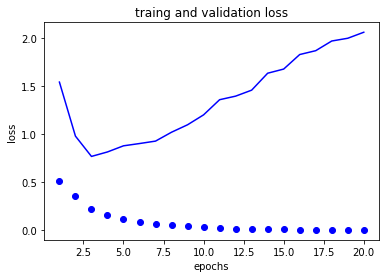

In [62]:
import matplotlib.pyplot as plt

history_dic = history.history
history_dic.keys()

acc = history_dic['binary_accuracy']
val_acc = history_dic['val_binary_accuracy']
loss = history_dic['loss']
val_loss = history_dic['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs, loss,'bo', label='trainning loss')
plt.plot(epochs , val_loss,'b',label='validation_loss')

plt.title('traing and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

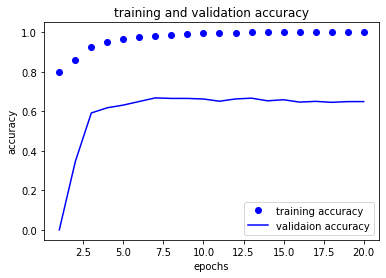

In [66]:
import matplotlib.pyplot as plt 
plt.clf()
plt.plot(epochs, acc, 'bo',label='training accuracy')
plt.plot(epochs, val_acc,'b',label='validaion accuracy')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import metrics 
from tensorflow.keras import losses
from keras.preprocessing.text import Tokenizer

trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)
tok = Tokenizer(num_words =10000,oov_token='UNK')
tok.fit_on_texts(trn_texts+tst_texts)
train_data = tok.texts_to_matrix(trn_texts,mode='binary')
test_data = tok.texts_to_matrix(tst_texts, mode = 'binary')
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
x_train,y_train,x_test,y_test = train_test_split(train_data, y_train, test_size=0.4, random_state=42)